# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  32% (1159/3558)
Updating files:  33% (1175/3558)
Updating files:  34% (1210/3558)
Updating files:  35% (1246/3558)
Updating files:  36% (1281/3558)
Updating files:  37% (1317/3558)
Updating files:  38% (1353/3558)
Updating files:  39% (1388/3558)
Updating files:  40% (1424/3558)
Updating files:  41% (1459/3558)
Updating files:  42% (1495/3558)
Updating files:  43% (1530/3558)
Updating files:  44% (1566/3558)
Updating files:  45% (1602/3558)
Updating files:  46% (1637/3558)
Updating files:  47% (1673/3558)
Updating files:  48% (1708/3558)
Updating files:  49% (1744/3558)
Updating files:  50% (1779/3558)
Updating files:  51% (1815/3558)
Updating files:  52% (1851/3558)
Updating files:  53% (1886/3558)
Updating files:  54% (1922/3558)
Updating files:  55% (1957/3558)
Updating files:  56% (1993/3558)
Updating files:  57% (2029/3558)
Updating files:  58% (2064/3558)
Updating files:  59% (2100/3558)
Updating files:  60% (2135/3558)
Updatin

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..............................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copyin

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
No local packages or working download links found for tensorflow_io
error: Could not find suitable distribution for Requirement.parse('tensorflow_io')


Obtaining file:///C:/dharun/object_detection/TFODCourse/Tensorflow/models/research/slim
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Building editable for slim (pyproject.toml): started
  Building editable for slim (pyproject.toml): finished with status 'done'
  Created wheel for slim: filename=slim-0.1-0.editable-py3-none-any.whl size=2344 sha256=80008cfe8252258e802d6310237f23e95048a74165e9d65f1f6fdb321eb70bbc
  Stored in direct

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.


In [16]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Traceback (most recent call last):
  File "C:\dharun\object_detection\TFODCourse\tfod2\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\models\ssd_efficientnet_bifpn_feature_extractor.py", line 36, in <module>
    from official.legacy.image_classification.efficientnet import efficientnet_model
ModuleNotFoundError: No module named 'official'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\dharun\object_detection\TFODCourse\Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "C:\dharun\object_detection\TFODCourse\tfod2\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py", line 70, in <module>
    from object_detection.models import ssd_efficientnet_bifpn_feature_extractor as ssd_efficientnet_bifpn
  File "C:\dharun\object_detection\TFODCourse\tfod2\lib

In [51]:
!pip install official

ERROR: Could not find a version that satisfies the requirement official (from versions: none)
ERROR: No matching distribution found for official


In [22]:
!pip install protobuf==3.19.4

In [20]:
!pip install --upgrade protobuf

In [12]:
!pip install tensorflow --upgrade

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/40/fa/98115f6fe4d92e1962f549917be2dc8e369853b7e404191996fedaaf4dd6/tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/e2/c4/6f8dae1530d57a6122fd5b72c750187484acbe612f630cb2179e4bcb12c1/h5py-3.9.0-cp310-cp310-win_amd64.whl.metadata
  Using c

In [24]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.4
Uninstalling protobuf-3.19.4:
  Successfully uninstalled protobuf-3.19.4


  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/80/70/dc63d340d27b8ff22022d7dd14b8d6d68b479a003eacdc4507150a286d9a/protobuf-4.23.4-cp310-abi3-win_amd64.whl.metadata
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl.metadata (540 bytes)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 0.0/55.3 kB ? eta -:--:--
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [583 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC
                    v.1929 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  copying lib\pylab.py -> build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\matplotlib
  copying lib\matplotlib\afm.py -> build\lib.win-amd64-3.10\matplotlib
  copying lib\matplotlib\animation.py -> build\lib.win-amd64-3.10\matplo

In [26]:
!pip install Pillow

  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/d0/4f/faebe1180e5e6ad6330c539dda7f6081182157393ba6816a438f759a0e59/Pillow-10.0.0-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB 9.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.5 MB 10.9 MB/s eta 0:00:01
   --------------------- ------------------ 1.4/2.5 MB 10.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.5 MB 9.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.2/2.5 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 10.0 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.


In [28]:
!pip install pyyaml

In [7]:
import object_detection

In [8]:
!pip list

Package                      Version   Editable project location
---------------------------- --------- ---------------------------------------------------------------------
absl-py                      1.4.0
anyio                        3.7.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.3
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml

In [9]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [............................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [18]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [19]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [20]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [15]:
!pip install tf-models-official

  Obtaining dependency information for tf-models-official from https://files.pythonhosted.org/packages/c9/c6/881f37a807affc009ccf84dfd9964b622e91e664f23a1cec1e443aa66ed1/tf_models_official-2.13.1-py2.py3-none-any.whl.metadata
  Using cached tf_models_official-2.13.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/6d/0b/889b9b839ea7237eb6048191fe653c17ce93e298495eaf8f893cff748951/Cython-3.0.0-cp310-cp310-win_amd64.whl.metadata
  Using cached Cython-3.0.0-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
  Obtaining dependency information for google-api-python-client>=1.6.7 from https://files.pythonhosted.org/packages/db/b8/c85d26d2fc42319df0bfdf8f549c89c014a4dbb395d6958ea25ce772238b/google_api_python_client-2.94.0-py2.py3-none-any.whl.metadata
  Using cached google_api_python_client-2.94.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Obtaining dependency infor

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [62 lines of output]
  C:\Users\dharu\AppData\Local\Temp\pip-build-env-biag27vb\overlay\Lib\site-packages\setuptools\config\setupcfg.py:293: _DeprecatedConfig: Deprecated config in `setup.cfg`
  !!
  
          ********************************************************************************
          The license_file parameter is deprecated, use license_files instead.
  
          By 2023-Oct-30, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    parsed = self.parsers.get(option_name, lambda x: x)(value)
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYA

In [13]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/30/b97456e7063edac0e5a405128065f0cd2033adfe3716fb2256c186bd41d0/pandas-2.0.3-cp310-cp310-win_amd64.whl.metadata
  Using cached pandas-2.0.3-cp310-cp310-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------------- ------------ 225.3/341.8 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.7 MB 13.1 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.7 MB 15.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.7 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.7 MB 13.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/10.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.


In [21]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [22]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [23]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [24]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [25]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [26]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [27]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [28]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [29]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [30]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [31]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [32]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [33]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [34]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [35]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

LiveLong


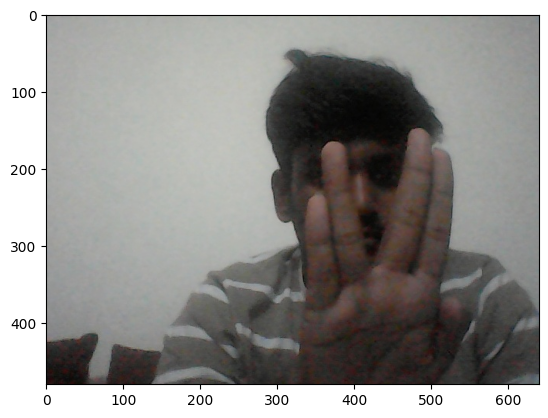

In [42]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.af496215-2897-11ee-9e8b-0045e2325396.jpg')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

# Print all the labels found in the image.
for label, score in zip(detections['detection_classes'] + label_id_offset, detections['detection_scores']):
    if score >= 0.8:  # You can adjust this threshold if needed.
        print(category_index[label]['name'])

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


# 9. Detect from an Image

In [43]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [80]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.af496215-2897-11ee-9e8b-0045e2325396.jpg')

In [81]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\livelong.af496215-2897-11ee-9e8b-0045e2325396.jpg'

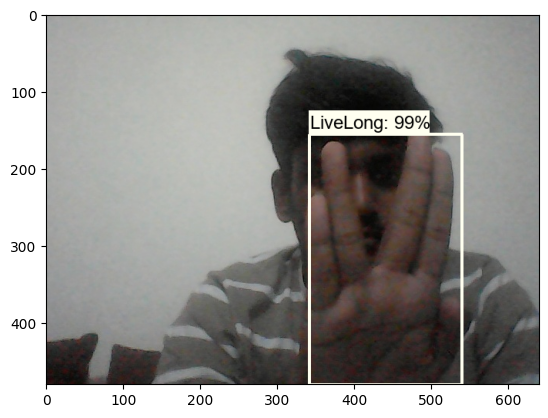

In [82]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [56]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [50]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [51]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [52]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [53]:
!{command}

2023-07-23 19:05:32.645665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0723 19:05:32.893367 12736 deprecation.py:641] From C:\dharun\object_detection\TFODCourse\tfod2\lib\site-packages\tensorflow\python\autograph\impl\api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:

# 11. Conversion to TFJS

In [54]:
!pip install tensorflowjs

  Obtaining dependency information for tensorflowjs from https://files.pythonhosted.org/packages/29/f8/f83b725878d8bd3305c7674221ee158b272cfed0ef3a7110e59f31cbcc13/tensorflowjs-4.9.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     -------------------------------------- 189.9/189.9 kB 5.6 MB/s eta 0:00:00
  Obtaining dependency information for importlib_resources>=5.9.0 from https://files.pythonhosted.org/packages/29/d1/bed03eca30aa05aaf6e0873de091f9385c48705c4a607c2dfe3edbe543e8/importlib_resources-6.0.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ---------------- ----------------------- 0.6/1.3 MB 11.5 MB/s eta 0:00:01
     ---------------------------------- ----- 1.1/1.3 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\dharun\\object_detection\\TFODCourse\\tfod2\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.



In [57]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [58]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [59]:
!{command}

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


In [60]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [61]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [62]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [63]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [64]:
!{command}

2023-07-23 22:04:46.564785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0723 22:04:50.334297  9068 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
2023-07-23 22:04:54.425046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
I0723 22:04:55.686165  9068 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0723 22:04:57.644736  9068 signature_serialization.py:148] Function `inference_fn` contains input name(s) resource with unsupported characters which will be renamed to weightsharedconvolutionalboxpredictor_predictiontower_conv2d_3_batchnorm_feature_4_fusedbatchnormv3_readvari

In [65]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [66]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [67]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [68]:
!{command}

2023-07-23 22:05:41.762829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 22:05:51.637011: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-23 22:05:51.637046: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-23 22:05:51.640783: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model
2023-07-23 22:05:51.704505: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-07-23 22:05:51.704745: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if pr

# 13. Zip and Export Models 

In [69]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [70]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'